## Scikit library

we can do supervised learning (regression, classification)<br>
unsupervised learning: clustering <br>
data preprocessing: ex feature extraction/selection, dimensionality reduction
<br>

it cannot do distributed computing (no parallelization of data) nor deep learning <br>

<br>
feature can be real values or integer values (for categorical value or mapping string)
<br>
we also have to get rid of missing values (ex fill values, delete unknown values or rows)
<br>
For <b>Unsupervised learning</b> we just need the features matrix <br>
For <b>Unsupervised learning</b> we need the features matrix ad a target array to train the model <br>
<br>
All models are represented by python classes, each classes includes: 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; -hyper parameters decided by the user (some default sensible parameters are provided)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; -parameters (which are learnt by the model during training autonomously ex tree structure)
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; -the methods to train the model and to make inference
<br>
every time this model is used, 4 steps are followed:
<ol>
<li>Find the module that you need (ex Knn, tree classifier) </li>
<li>Instantiate a model of this class and build the model with hyper parameters (ex gini index and tree depth)</li>
<li>Train model parameters on you data model.fit(x_train [features], y_train [label])</li>
<li>then use the model to make predictions (model.predict() or model.transform())</li>
</ol>
<br>
The difference is that, we separate <b>Estimators</b> (estimate and make a prediction) into:
<ul>
<li>PREDICTORS : an estimator supporting the predict model, used for predicting values (generally after a training)</li>
<li>TRANSFORMERS : transform an input into another value (new representation of the same data) ex from a gaussian to a standard normal or normalization of values</li>
</ul>
Typically all pre processing is typically done by transformers and then finally we use predictors 
<br>

#### PREDICTORS
we have several methods:
<ul>
<li>fit(): we pass the data to train model (also pass y if supervised learning model)</li>
<li>predict(): we only pass the x we want to classify (we don't know y) -> predict label</li>
<li>fit_predict(): fit model and make prediction </li>
</ul>

#### TRANSFORMERS
we have several methods:
<ul>
<li>fit(): learn model parameters from input data (ex learn min and max values for minMax normalization)</li>
<li>transform() : transform the data into a different representation ex rescale in [0,1]</li>
<li>fit_Transform() : both operations are done together (we don't care about fitting)</li>
</ul>







### Scikit learn usage 
as usual there are a lot of fucking parameters to be set and be used (read the documentation)<br>


,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


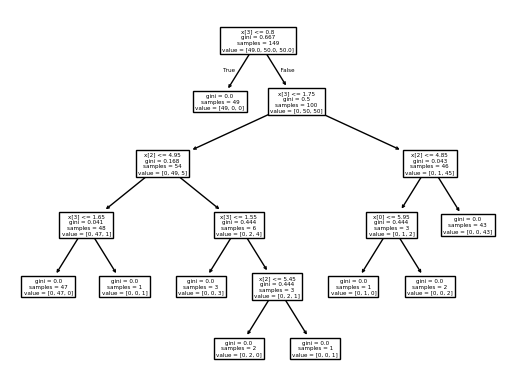

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd 


df = pd.read_csv('iris.csv', header=None).set_axis(['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'species'], axis=1)
display(df)

clf = DecisionTreeClassifier()
z = clf.fit(df.iloc[1:, 0:4], df.iloc[1:, -1])
y = clf.predict(df.iloc[1:, 0:4])
plot_tree(z)


from sklearn.ensemble import RandomForestClassifier
x = RandomForestClassifier()
z = x.fit(df.iloc[1:, 0:4], df.iloc[1:, -1])
y = x.predict(df.iloc[1:, 0:4])




## CLASSIFICATION

our dataset is just a sample of the total population of the world <br>
if you choose the best model for your data it may nor work well for other data, to avoid so (no over fitting) use data partition
<br> ex 70/15/15 
<br> sklearn implements a splitting mechanism to be used for training set, which are partitioned and shuffled

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


100.0

100.0
[[ 9  0  0]
 [ 0  6  0]
 [ 0  0 15]]


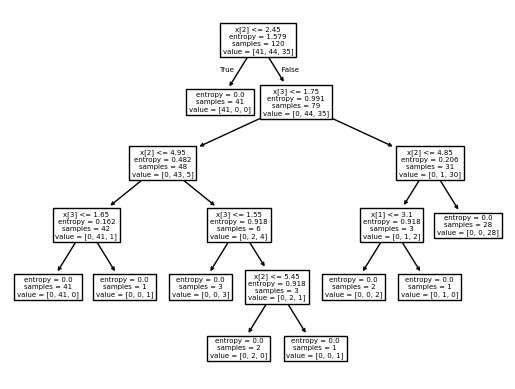

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, confusion_matrix
import pandas as pd 



df = pd.read_csv('iris.csv', header=None).set_axis(['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'species'], axis=1)
display(df)

clf = DecisionTreeClassifier(criterion='entropy')
x = df.iloc[:, 0:4]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
clf.fit(x_train, y_train)

#z = clf.fit(x, y)
#y = clf.predict(df.iloc[1:, 0:4])


acc = sum([1 for i in range(len(y_test)) if y_test.values[i] == clf.predict(x_test)[i]]) /len(y_test.values) * 100

display(acc)

plot_tree(clf)

print(precision_score(y_true=y_test, y_pred=clf.predict(x_test), average='macro')*100)
print(confusion_matrix(y_true=y_test, y_pred=clf.predict(x_test)))

### AVERAGE

macro average = each class is weighted the same and without changes (balanced problem)<br>
weighted average = each class is weighted with a proportional schema (unbalanced problem)<br>

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


86.66666666666667

87.2053872053872
[[10  0  0]
 [ 0  8  3]
 [ 0  1  8]]


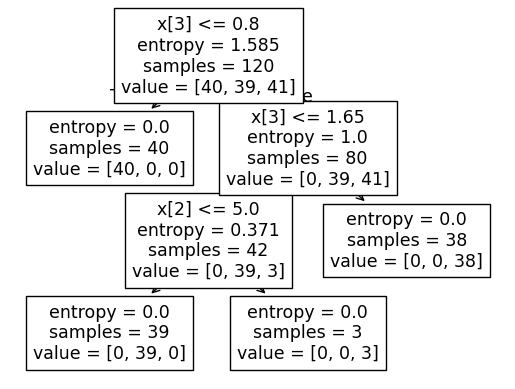

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.model_selection import KFold
import pandas as pd 



df = pd.read_csv('iris.csv', header=None).set_axis(['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'species'], axis=1)
display(df)

clf = DecisionTreeClassifier(criterion='entropy')
x = df.iloc[:, 0:4]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)
clf.fit(x_train, y_train)

#z = clf.fit(x, y)
#y = clf.predict(df.iloc[1:, 0:4])


acc = sum([1 for i in range(len(y_test)) if y_test.values[i] == clf.predict(x_test)[i]]) /len(y_test.values) * 100

display(acc)

plot_tree(clf)

print(precision_score(y_true=y_test, y_pred=clf.predict(x_test), average='macro')*100)
print(confusion_matrix(y_true=y_test, y_pred=clf.predict(x_test)))

### K FOLD CROSS VALIDATION
we partition the set into k partition and from each partition we take a percentage of the data to be used as a test for our model

to use a kfold validation we can ise the kfold function
<br>
NOTE: all the points are only used once for testing<br>
NOTE: if you use n_splits equal to the number of data you have the most cross validation possible


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

x = np.random.random((15,3))
y = np.random.randint(0,2,15)

kfold = KFold(n_splits=5, shuffle=True)

# x_train, x_test, y_train, y_test = 


for train_ndx, test_ndx in kfold.split(x, y):
    print(train_ndx, test_ndx)
    
"""    
clf = DecisionTreeClassifier()
clf.fit()
print("accuracy = ", accuracy_score( clf.predict()))
"""

[ 0  1  2  3  4  5  6  7  9 10 11 12] [ 8 13 14]
[ 1  2  3  4  5  6  8 10 11 12 13 14] [0 7 9]
[ 0  1  2  4  5  7  8  9 11 12 13 14] [ 3  6 10]
[ 0  1  3  4  6  7  8  9 10 12 13 14] [ 2  5 11]
[ 0  2  3  5  6  7  8  9 10 11 13 14] [ 1  4 12]


### KFOLD 
kfold using cross val score function, which is a wrapper function for kfold. <br> 
we specify the classifier, the full dataSet, and the kind of cross validation(with the method to use) <br>
and finally a function to be used <br>
we can also compute mean and variance of the score to understand how well it behaves  

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

X = np.random.random((10,3))
y = np.random.randint(0,2,10)

# one value for each of the accuracy of each of the fold
# We have also to pass the hyper parameters if we want to pass and test said parameters

for max_depth in [1, 10, 50, 100]:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    print("Validation : ", cross_val_score(clf, X, y, cv=3, scoring='accuracy'))


Validation :  [0.5        0.33333333 0.33333333]
Validation :  [0.5        0.33333333 0.33333333]
Validation :  [0.5        0.33333333 0.33333333]
Validation :  [0.5        0.33333333 0.33333333]


### KFOLD 3 
we will automatically predict what the model is going to predict, without letting the model see the training set.
<br>
This returns the weighted average which is different from the total average

In [25]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

X = np.random.random((10,3))
y = np.random.randint(0,2,10)
clf = DecisionTreeClassifier()

print(accuracy_score(y, cross_val_predict(clf, X, y, cv=3)))

0.8
